In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.style.use('classic')
mmaxstr = 'M_{max}'

# Cesta k souboru
file_path = 'normal_res.txt'

# Načtení dat
df = pd.read_csv(file_path, sep=r'\s+', header=None,
                 names=["name", "test_id", "mmax", "test_type", "number_of_points", "num_err", "distance_err",
                        "normal_err", "testedpoints"])
df.replace(np.inf, 0, inplace=True)

df = df.drop((df[(df['normal_err'] > 2) | (df['normal_err'] < 0)]).index)
df = df.drop((df[(df['distance_err'] > 4e12)]).index)




In [2]:

# Definice názvů sloupců
df.reset_index(drop=True, inplace=True)
# Výpis DataFrame
# replace infinite values with 0

df["num_err"] = 1 - (df["num_err"] / df['testedpoints'])

df["normal_err"] /= 2

df_first = df[df['test_type'] == 'first']
df_leaf = df[df['test_type'] == 'leaf']
df_leaf1 = df[df['test_type'] == 'leaf1']
df_it = df[df['test_type'] == 'it']

df_it

,name,test_id,mmax,test_type,number_of_points,num_err,distance_err,normal_err,testedpoints
54,100,0,8,it,100,0.0,398632.384489,0.598393,10.0
112,100,0,8,it,100,0.0,213209.735648,0.593890,10.0
311,100,1,8,it,100,0.0,425738.895986,0.599796,10.0
324,100,1,8,it,100,0.0,203007.659438,0.599395,10.0
601,100,2,8,it,100,0.0,335004.384661,0.599544,10.0
...,...,...,...,...,...,...,...,...,...
349951,1000000,29,96,it,100,0.0,46843.363861,0.999998,10.0
349955,1000000,29,96,it,100,0.0,13590.083957,0.989649,10.0
349959,1000000,29,96,it,100,0.0,27257.681577,0.999917,10.0
349963,1000000,29,96,it,100,0.0,125595.009279,0.999996,10.0


In [3]:

df_first = df_first.drop(columns=['test_type', 'testedpoints'])
df_leaf = df_leaf.drop(columns=['test_type', 'testedpoints'])
df_leaf1 = df_leaf1.drop(columns=['test_type', 'testedpoints'])
df_it = df_it.drop(columns=['test_type', 'testedpoints'])

df_it

,name,test_id,mmax,number_of_points,num_err,distance_err,normal_err
54,100,0,8,100,0.0,398632.384489,0.598393
112,100,0,8,100,0.0,213209.735648,0.593890
311,100,1,8,100,0.0,425738.895986,0.599796
324,100,1,8,100,0.0,203007.659438,0.599395
601,100,2,8,100,0.0,335004.384661,0.599544
...,...,...,...,...,...,...,...
349951,1000000,29,96,100,0.0,46843.363861,0.999998
349955,1000000,29,96,100,0.0,13590.083957,0.989649
349959,1000000,29,96,100,0.0,27257.681577,0.999917
349963,1000000,29,96,100,0.0,125595.009279,0.999996


In [4]:

group = ["mmax", "name"]

df_first = df_first.groupby(group).mean().reset_index()
df_leaf = df_leaf.groupby(group).mean().reset_index()
df_leaf1 = df_leaf1.groupby(group).mean().reset_index()
df_it = df_it.groupby(group).mean().reset_index()
df_it

,mmax,name,test_id,number_of_points,num_err,distance_err,normal_err
0,8,100,15.258333,100.0,0.010833,294549.960270,0.620587
1,8,1000,14.416562,100.0,0.081438,42830.867910,0.915011
2,8,10000,14.449270,100.0,0.008503,46300.599346,0.989821
3,8,100000,14.466978,100.0,0.000826,69468.383455,0.996603
4,8,1000000,14.437153,100.0,0.001768,77558.063288,0.995779
5,16,100,12.500000,100.0,0.003846,352442.549075,0.722944
6,16,1000,14.438633,100.0,0.036521,48108.096868,0.959402
7,16,10000,14.467348,100.0,0.003689,52567.330752,0.994214
8,16,100000,14.467528,100.0,0.000536,62024.080259,0.996688
9,16,1000000,14.470447,100.0,0.000344,76104.406610,0.994761


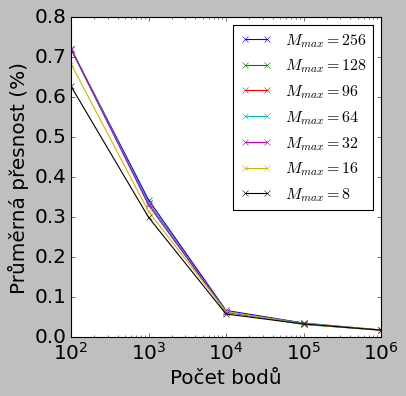

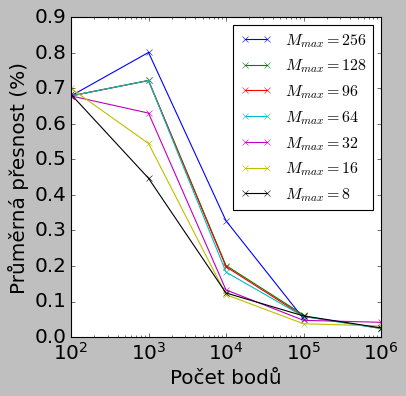

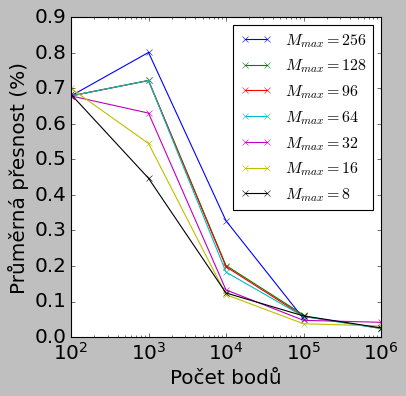

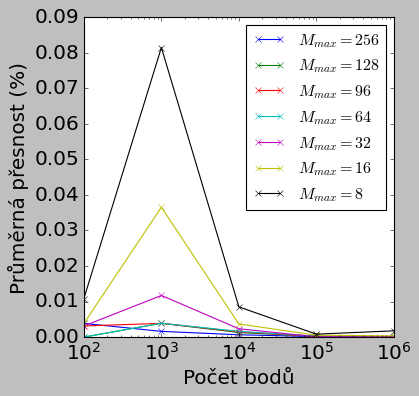

In [5]:


for it_df, name in zip([df_first, df_leaf, df_leaf1, df_it], ["first", "leaf", "leaf1", "it"]):
    # it_df = it_df[it_df['name'] == 1000000]
    fig, ax = plt.subplots(figsize=(5, 5))
    m_max_values = sorted(it_df['mmax'].unique(), reverse=True)
    for i in m_max_values:
        tmp_df = it_df.loc[df_first['mmax'] == i]
        if not tmp_df.empty:
            ax.plot(tmp_df['name'], tmp_df['num_err'], '-x', label=f"${mmaxstr}= {i}$")

    ax.set_xscale('log')
  
    ax.legend(loc="upper right", ncol=1)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

    ax.set_ylabel('Průměrná přesnost (%)', fontsize=18)
    ax.set_xlabel(f'Počet bodů', fontsize=18)

    plt.savefig(f'acccurucy_{name}_err_cases.pdf', bbox_inches='tight')
    plt.show()


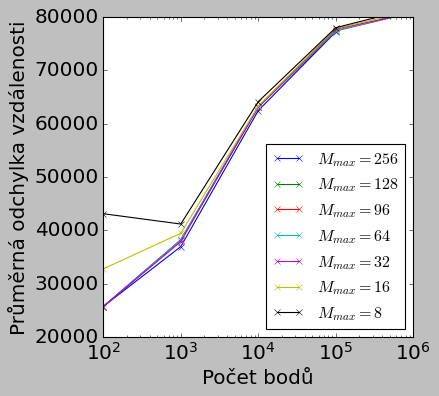

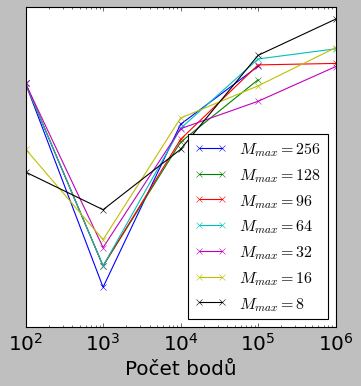

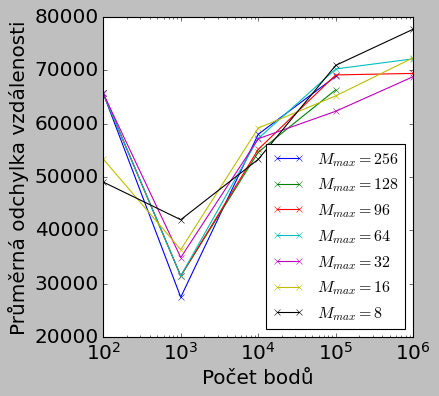

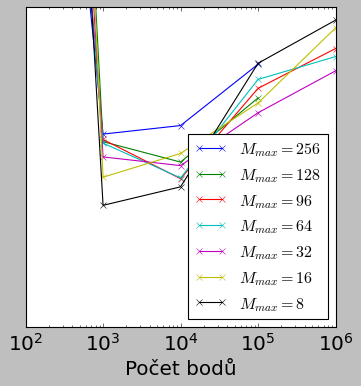

In [6]:


for it_df, name in zip([df_first, df_leaf, df_leaf1, df_it], ["first", "leaf", "leaf1", "it"]):
    # it_df = it_df[it_df['name'] == 1000000]
    fig, ax = plt.subplots(figsize=(5, 5))
    m_max_values = sorted(it_df['mmax'].unique(), reverse=True)
    for i in m_max_values:
        tmp_df = it_df.loc[df_first['mmax'] == i]
        if not tmp_df.empty:
            ax.plot(tmp_df['name'], tmp_df['distance_err'], '-x', label=f"${mmaxstr}= {i}$")

    ax.set_xscale('log')
    if name != "it":
        ax.legend(loc="lower right", ncol=1)
    else:
        ax.legend(loc="lower right", ncol=1)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

    plt.ylim(20000, 80000)

    if name == "it" or name == "leaf":
        ax.get_yaxis().set_visible(False) 
    else:
        ax.set_ylabel('Průměrná odchylka vzdálenosti', fontsize=18)

    # ax.set_ylabel('Průměrná odchylka vzdálenosti', fontsize=18)
    ax.set_xlabel(f'Počet bodů', fontsize=18)

    plt.savefig(f'acccurucy_{name}_err_distance.pdf', bbox_inches='tight')
    plt.show()


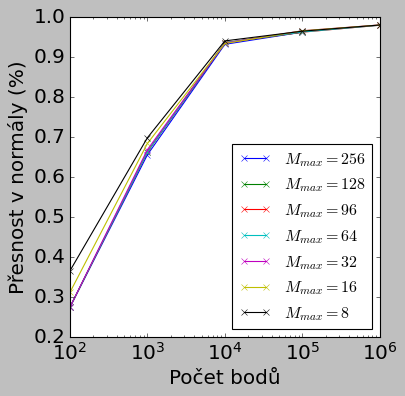

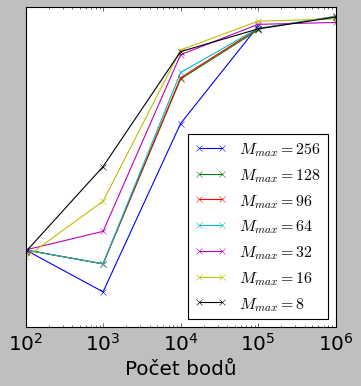

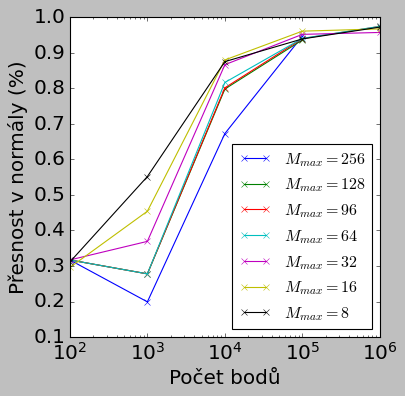

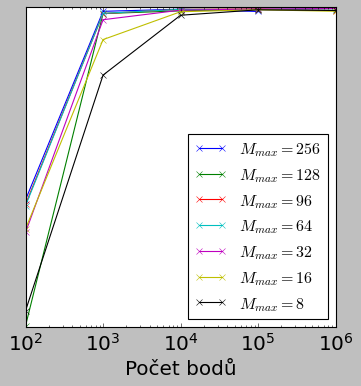

In [7]:
for it_df, name in zip([df_first, df_leaf, df_leaf1, df_it], ["first", "leaf", "leaf1", "it"]):
    # it_df = it_df[it_df['name'] == 1000000]
    fig, ax = plt.subplots(figsize=(5, 5))
    m_max_values = sorted(it_df['mmax'].unique(), reverse=True)
    for i in m_max_values:
        tmp_df = it_df.loc[df_first['mmax'] == i]
        if not tmp_df.empty:
            ax.plot(tmp_df['name'], tmp_df['normal_err'], '-x', label=f"${mmaxstr}= {i}$")

    ax.set_xscale('log')
    ax.legend(loc="lower right", ncol=1)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

    ax.set_ylabel('Přesnost v normály (%)', fontsize=18)
    ax.set_xlabel(f'Počet bodů', fontsize=18)
    
    if name == "it" or name == "leaf":
        ax.get_yaxis().set_visible(False) 
    else:
        ax.set_ylabel('Přesnost v normály (%)', fontsize=18)

    plt.savefig(f'acccurucy_{name}_err_normal.pdf', bbox_inches='tight')
    plt.show()
